In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
file1 = 'C:\\Users\\User\\PycharmProjects\\pythonProject2\\Term Project Data\\Cs137.csv'

d = pd.read_csv(file1)
df = pd.DataFrame(d)

In [3]:
a = 0.2
b = -80
df['E'] = ((a * (df['X-'] + df['X+'] + df['Y+'] + df['Y-']) + b)/32)
df2 = df[(df['E'] < 1500) & (df['E'] >= 0)]

In [4]:
x = [i for i in range (0, 1501)]
y = [0 for i in range(0, 1501)]
for i in range(len(df2)):
    pos_x = x.index(int(df2.iloc[i]['E'])) 
    y[pos_x] += 1

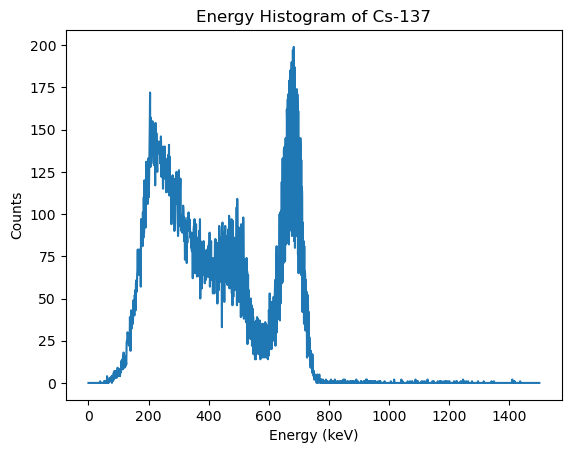

In [5]:
plt.figure()
plt.plot(x,y)
plt.title('Energy Histogram of Cs-137')
plt.xlabel('Energy (keV)')
plt.ylabel('Counts')
plt.show()

In [6]:
df3 = df2[(df2['E'] <= 662 * 1.1) & (df2['E'] >= 662 * 0.9)]

In [7]:
X = (df3['X+'] - df3['X-'])/(df3['X+'] + df3['X-'])
Y = (df3['Y+'] - df3['Y-'])/(df3['Y+'] + df3['Y-'])

In [8]:
X = X[(X > -1) & (X < 1)]
Y = Y[(Y > -1) & (Y < 1)]

In [9]:
file2 = 'C:\\Users\\User\\PycharmProjects\\pythonProject2\\Term Project Data\\Cs137_Segmap.csv'
segmap = np.genfromtxt(file2, delimiter=',')

In [10]:
x_index = ((X + 1) / 2 * 512).astype(int)
y_index = ((Y + 1) / 2 * 512).astype(int)

In [11]:
seg_values = segmap[y_index, x_index]

In [12]:
seg_result = np.zeros((361), dtype=int)

In [13]:
seg_result_list = [v for v in seg_result]
seg_values_list = [int(q) for q in seg_values]

In [14]:
grid = np.zeros((19, 19))

for number in range(1, 362):
    c = (number - 1) // 19
    d = (number - 1) % 19
    grid[c, d] = number

In [15]:
for i in seg_values_list:
    if i in grid:
        seg_result_list[i-1] += 1

In [16]:
pattern_array = np.array(seg_result_list)
pattern_array_19x19 = pattern_array.reshape(19,19)

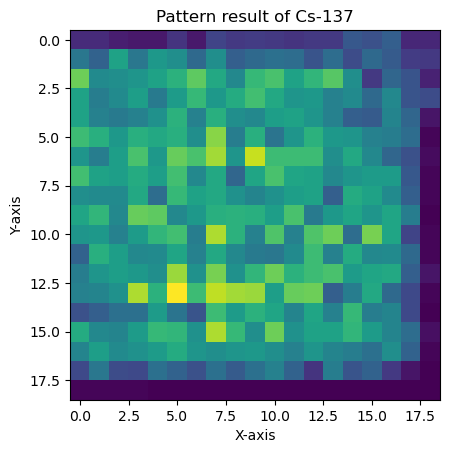

In [17]:
plt.imshow(pattern_array_19x19)
plt.title('Pattern result of Cs-137')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()

In [18]:
peak_row = np.argmax(pattern_array_19x19, axis=1)

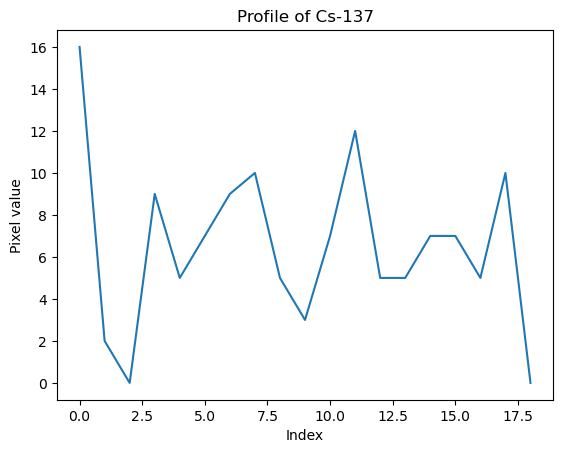

In [19]:
plt.plot(peak_row)
plt.title('Profile of Cs-137')
plt.xlabel('Index')
plt.ylabel('Pixel value')
plt.show()